In [1]:
# importing python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"athlete_events - athlete_events.csv")
df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


### Question - 1

In [3]:
df['year'] = df['Games'].astype(str).str.split(expand = True)[0].str.strip()
London2012_mask = (
    (df['year'] == '2012')
    & (df['City'] == 'London') 
)
print(
    "Number of total unique participants in London 2012 Game: ", 
    df[London2012_mask]['ID'].nunique()
)

Number of total unique participants in London 2012 Game:  10517


### Question - 2

In [4]:
df['year'] = df['Games'].astype(str).str.split(expand = True)[0].str.strip().astype(int)
Beijing2008_mask = (
    (df['year'] == 2008)
    & (df['City'] == 'Beijing') 
)
print("Beijing 2008 game:\n")
(
    df[Beijing2008_mask]
    .groupby(['Sex'])
    ['ID']
    .nunique()
    .reset_index()
    .rename(columns = {'ID': 'Number of Athletes'})
)

Beijing 2008 game:



,Sex,Number of Athletes
0,F,4609
1,M,6290


### Question - 3

In [5]:
df['is_medal'] = df['Medal'].notnull().astype(int)
print('Top 10 Athletes with Most Medal: \n')
(
    df
    .groupby(['ID', 'Name'])
    ['is_medal']
    .sum()
    .sort_values(ascending = False)
    .head(10)
    .reset_index()
    .rename(columns = {'is_medal': 'Number of Medals'})
)

Top 10 Athletes with Most Medal: 



,ID,Name,Number of Medals
0,94406,"Michael Fred Phelps, II",28
1,67046,Larysa Semenivna Latynina (Diriy-),18
2,4198,Nikolay Yefimovich Andrianov,15
3,89187,Takashi Ono,13
4,11951,Ole Einar Bjrndalen,13
5,74420,Edoardo Mangiarotti,13
6,109161,Borys Anfiyanovych Shakhlin,13
7,85286,Aleksey Yuryevich Nemov,12
8,119922,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12
9,87390,Paavo Johannes Nurmi,12


### Question - 4

<AxesSubplot:title={'center':'Number of Nations Participated Each Year'}, xlabel='year'>

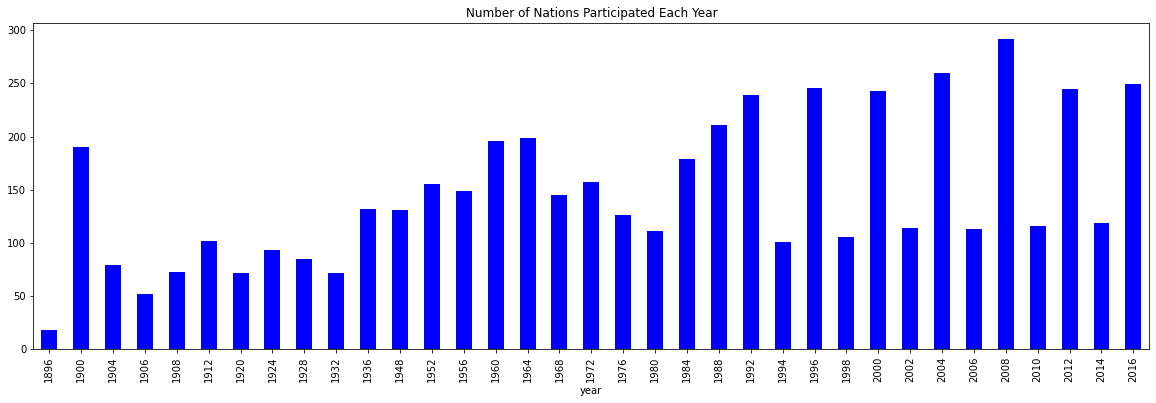

In [6]:
(
    df
    .groupby('year')
    ['Team']
    .nunique()
    .sort_index()
    .plot(
        kind = 'bar', 
        figsize = (20, 6), 
        color = 'b',
        title = 'Number of Nations Participated Each Year'
    )
)

### Question - 5

<AxesSubplot:title={'center':'Gold Medals Won by USA'}, xlabel='year'>

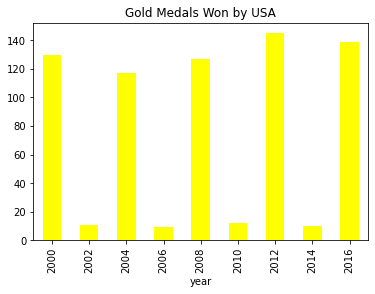

In [7]:
usa_team_list = [i for i in df['Team'].unique() if 'United States' in i]
mask_usa_gold = (
    (df['Team'].isin(usa_team_list))
     & (df['year']>=2000)
     & (df['Medal'] == 'Gold')
)
(
    df[mask_usa_gold]
    .groupby('year')
    ['is_medal']
    .sum()
    .sort_index()
    .plot(kind = 'bar', color = 'yellow', title = 'Gold Medals Won by USA')
)